In [6]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import random as rd
import pandas as pd
import numpy as np

In [52]:
dataf = pd.read_csv("results/responses.csv")
exec_dfModal = pd.read_csv("results/execTimeMultimodal.csv")
exec_dfCriteria = pd.read_csv("results/execTimeMultiCriteria.csv")
dataf.rename(columns = {"distance":"length"},inplace=True)

In [8]:
def getBars(df,labels,value):
    bars = []
    for i in labels:
        bars.append(df.groupby("modal").get_group(i)[value].tolist())
    return bars

def plotBarSubPlot(group,ylabels,translator,labels,title,fname=None):
    fig, axs = plt.subplots(1,4)
    barWidth = 0.2
    sns.set_style("whitegrid",{'grid.linestyle': '--','axes.facecolor': '#F4F4F4'})

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    #colors = ["#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d"]
    colors = sns.color_palette('muted')

    for sub in range(len(ylabels)):
        bars = getBars(group,labels,ylabels[sub])
        r1 = np.arange(len(bars[0]*2),step=2)
        for i in range(len(bars)): 
            #axs[sub].set_title(sub)
            axs[sub].bar(r1, bars[i], color=colors[i], width=barWidth, edgecolor='black', label=labels[i],hatch=patterns[i])
            r1 = [x + barWidth for x in r1]

            axs[sub].set_xlabel(translator[ylabels[sub]], fontweight='bold',fontsize='x-large')
            axs[sub].set_xticks([])

    sns.despine()
    plt.rcParams["figure.figsize"] = (12,3)
    plt.legend(loc="upper right",bbox_to_anchor=(-1,1.37),fancybox=True,shadow=True,ncol=3,prop={'weight':'bold'})
    fig.suptitle(title,fontsize =20,fontweight='bold',y=1.24)
    if fname != None: plt.savefig('results/plots/'+fname+".pdf",bbox_inches="tight")
    plt.show()
    plt.close()

def plotBars(bars, ylabel, labels, fluxos, title, fname=None):
    barWidth = 0.2
    sns.set_style("white") # 'whitegrid',{'grid.linestyle': '--','axes.facecolor': '#F4F4F4'}

    plt.title(title,fontsize =20,fontweight='bold',y=1.40)

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    #colors = ["#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d"]
    colors = sns.color_palette('muted')
    
    r1 = np.arange(len(bars[0]*2),step=2)
    for i in range(len(bars)): # bar number per flow

        plt.bar(r1, bars[i], color=colors[i], width=barWidth, edgecolor='black', label=labels[i],hatch=patterns[i])
        r1 = [x + barWidth for x in r1]
    
    plt.xlabel('Routes', fontweight='bold',fontsize='x-large')
    plt.ylabel(ylabel, fontweight='bold',fontsize='x-large')
    plt.xticks([2*r + 4*barWidth for r in range(len(bars[0]))],fluxos,fontweight='bold',fontsize='x-large')
 
    plt.legend(loc="upper center",bbox_to_anchor=(0.26,1.37),fancybox=True,shadow=True,ncol=3,prop={'weight':'bold'})
    
    sns.despine()
    plt.rcParams["figure.figsize"] = (12,3)
    
    if fname != None: plt.savefig('results/plots/'+fname+".pdf",bbox_inches="tight")
    plt.show()
    plt.close()

def plotBoxPlots(df,ref,label,title,x,fname=None,clean=False):
    fig,ax = plt.subplots()
    hatches = [ "///" , "\\\\" , "||" , "--" , "++" , "xx", "oo", "OO", "..", "**" ]
    sns.set(style="darkgrid")
    flierprops = {"marker":"d",
                'markeredgecolor': 'none',
                'markerfacecolor': 'grey'}
    medianprops = {"color":"k","linewidth": 2}
    plt.title(title,fontsize=20,fontweight='bold')
    if clean:
        sns.boxplot(data=df,x=x,y=ref,hue=ref,dodge=False,medianprops=medianprops,showfliers = False)
    else:
        sns.boxplot(data=df,x=x,y=ref,hue=ref,flierprops=flierprops,dodge=False,medianprops=medianprops)
    #a.legend_.remove()
        

    for i, box in enumerate(ax.patches):
        box.set_hatch(hatches[i])
        #fc = box.get_facecolor()
        box.set_edgecolor('black')
        #box.set_facecolor('none')

    plt.xlabel(label,fontsize=15,fontweight='bold')
    upper = ref[0].upper() + ref[1:]
    plt.ylabel(upper,fontweight='bold',fontsize=15)
    plt.tick_params(labelsize="large",labelcolor='black')

    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams["figure.figsize"] = (10,4)
 

    if clean and fname != None:
        plt.savefig('results/plots/'+fname+"Clean.pdf",bbox_inches="tight")
    elif fname != None:
        plt.savefig('results/plots/'+fname+".pdf",bbox_inches="tight")
    plt.show()

def divide_range(min_val, max_val):

    divisions = np.linspace(min_val, max_val, 4)
    windows = [(divisions[i]) for i in range(3)]

    return windows

def normalize(array_data):
    max_data = np.amax(array_data)
    min_data = np.amin(array_data)
    return list(map(lambda i: (i-min_data) / (max_data - min_data),array_data))

In [9]:
## dataset filtering

rmLabels = ['Unnamed: 0','setID','modal']
ylabels = dataf.columns
ylabels = [ele for ele in ylabels if ele not in rmLabels]

removeID = dataf.loc[dataf['modal'] == 'error']['setID'].to_list()
dataf_new = dataf.drop(dataf[dataf['setID'].isin(removeID)].index)

dataf_new['duration'] = dataf_new['duration'].apply(lambda x: x/60)
dataf_new['length'] = dataf_new['length'].apply(lambda x: x/1000)

normalization = lambda x: (x-x.mean())/ x.std()

dataf_new["duration_norm"] = dataf_new.groupby("setID")["duration"].transform(normalize)
dataf_new["length_norm"] = dataf_new.groupby("setID")["length"].transform(normalize)
dataf_new["emission_norm"] = dataf_new.groupby("setID")["emission"].transform(normalize)
dataf_new["price_norm"] = dataf_new.groupby("setID")["price"].transform(normalize)

dataf_new.rename(columns={"Unnamed: 0": "index"},inplace=True)

dataf_new['modal'] = dataf_new['modal'].replace(['transit'], 'public transport')
dataf_new['modal'] = dataf_new['modal'].replace(['car-transit'], 'car-public transport')
dataf_new['modal'] = dataf_new['modal'].replace(['bicycle-transit'], 'bicycle-public transport')

dataf_new['modal'] = dataf_new['modal'].replace(['transit-car'], 'public transport-car')
dataf_new['modal'] = dataf_new['modal'].replace(['transit-bicycle'], 'public transport-bicycle')

labels = dataf_new['modal'].unique().tolist()
if "error" in labels: labels.remove("error")

dataf_new.to_csv("results/filtered_responses.csv",index=False)

In [10]:
## separating data by window

dataf_median = dataf_new.groupby("setID")['length'].median()
distance_wind = divide_range(min(dataf_median), max(dataf_median))

series_wind1 = dataf_median.loc[dataf_median <= distance_wind[1]]
series_wind2 = dataf_median.loc[(dataf_median > distance_wind[1]) & (dataf_median <= distance_wind[2])]
series_wind3 = dataf_median.loc[dataf_median > distance_wind[2]]

windows = [series_wind1,series_wind2,series_wind3]

print(distance_wind,dataf_new['length'].max())
print([i.shape[0] for i in windows])

[4.465, 15.459, 26.453] 72.176
[66, 64, 7]


In [11]:
translator = {"length": "Length (km)","duration": "Duration (min)","price": "Price", "emission": "Emission (kg CO2)"}

group 1


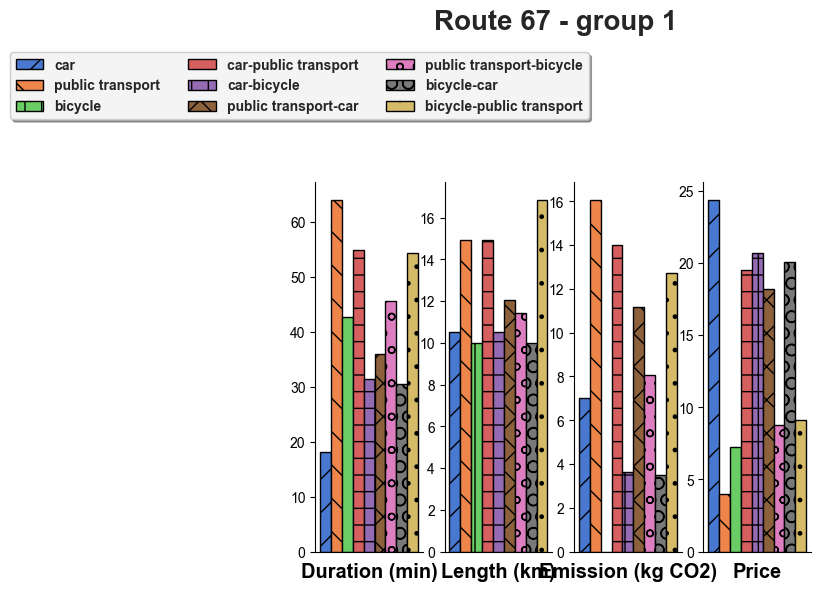

group 2


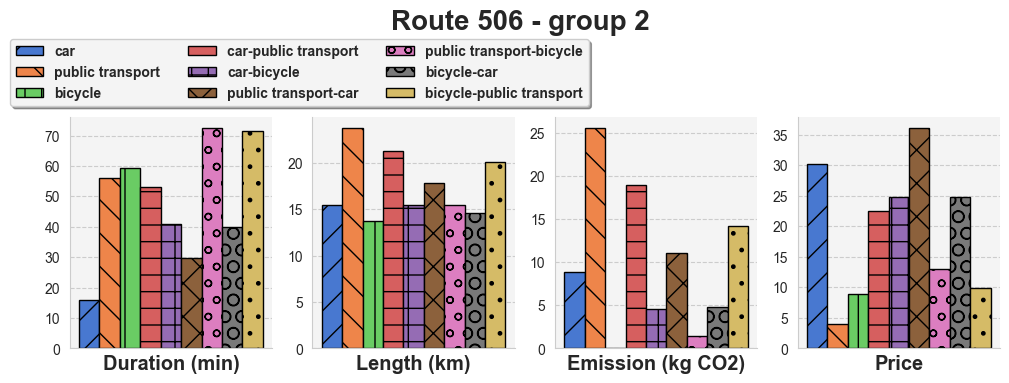

group 3


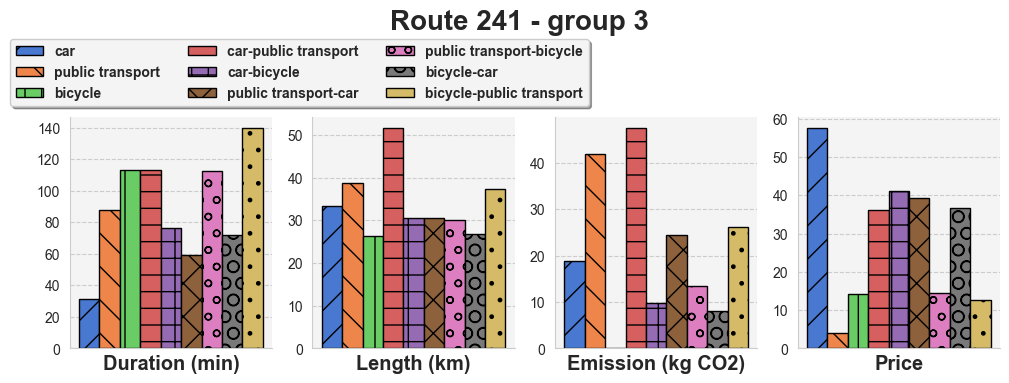

In [12]:
rd.seed(10)

for j in range(len(distance_wind)):
    print("group",j+1)
    sampl = rd.sample(sorted(windows[j].index),1)
    
    group = dataf_new.loc[dataf_new['setID'].isin(sampl)] # group data by sample
    route = f"Route {int(sampl[0])}"
    title = f"{route} - group {j+1}"
    plotBarSubPlot(group,ylabels,translator,labels,title,fname=title)

group 1


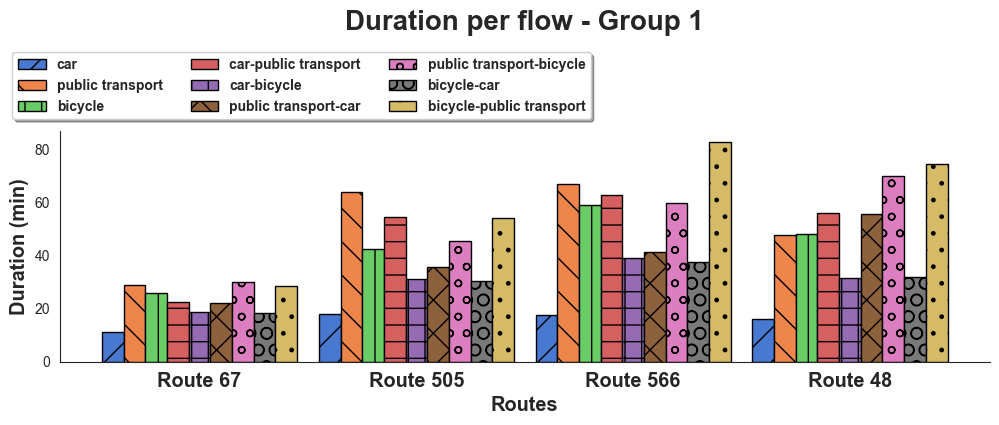

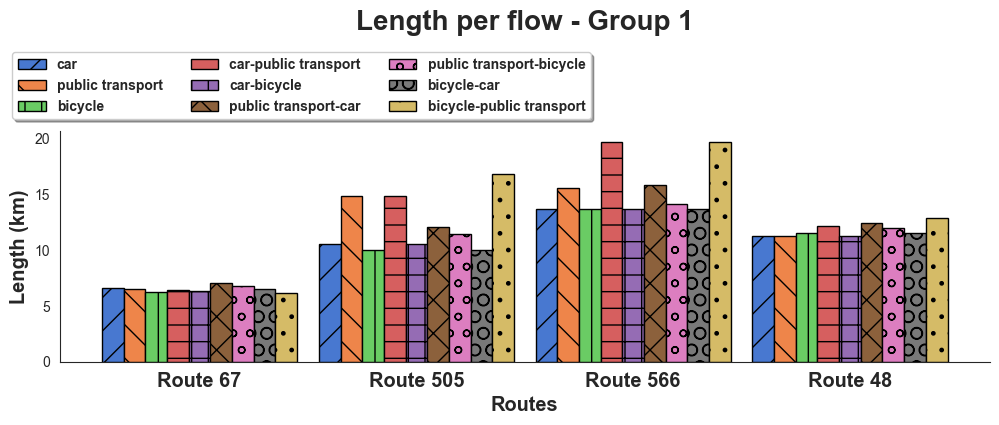

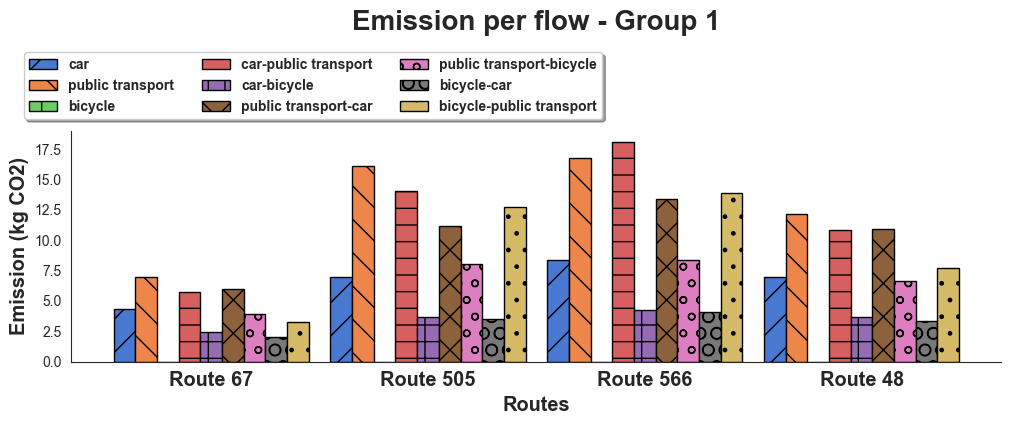

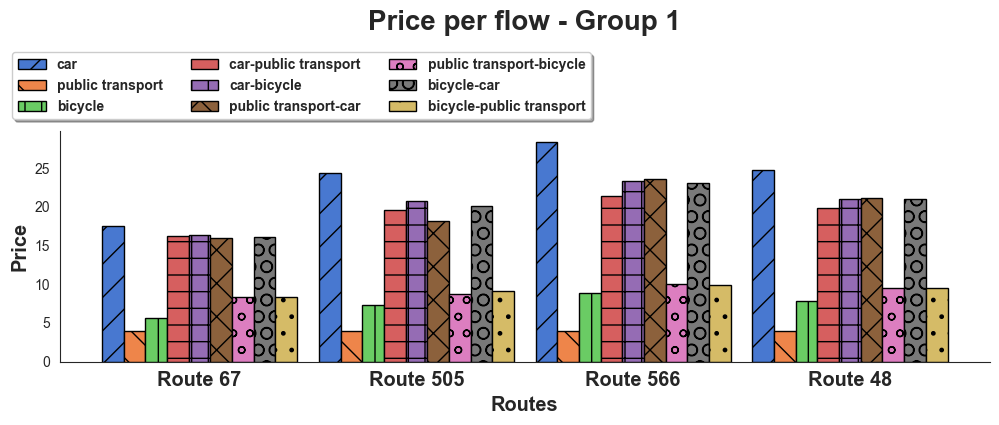

group 2


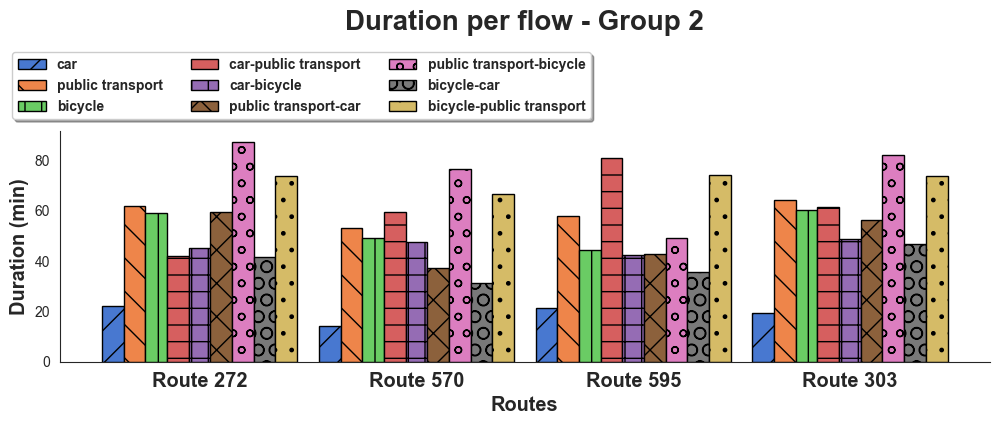

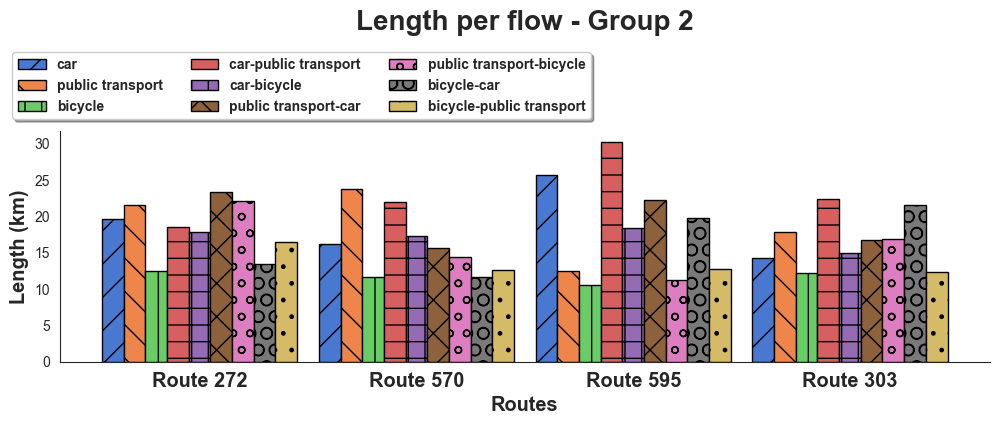

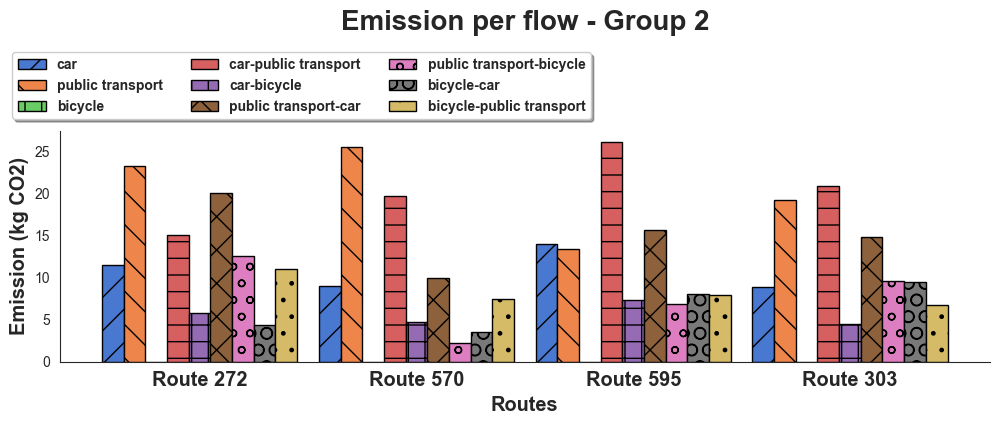

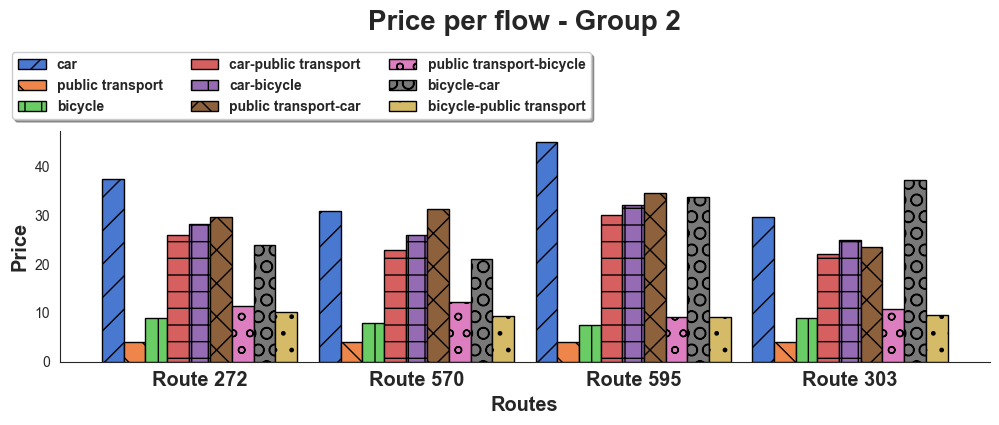

group 3


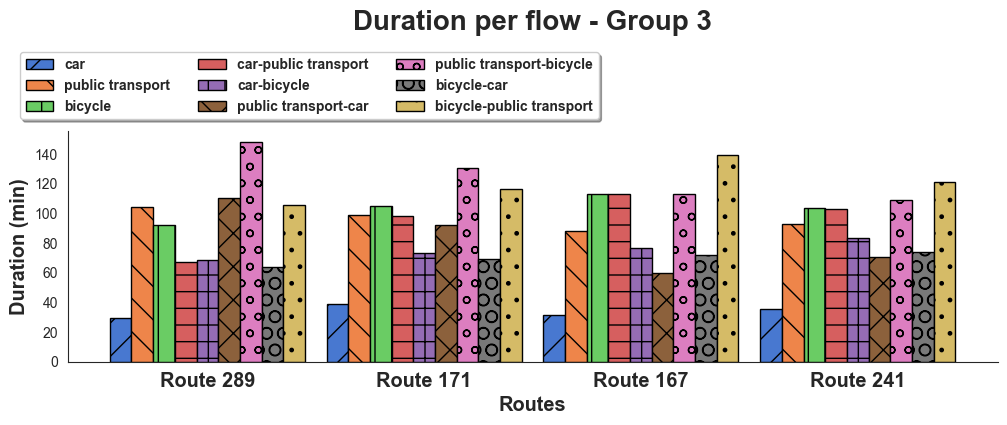

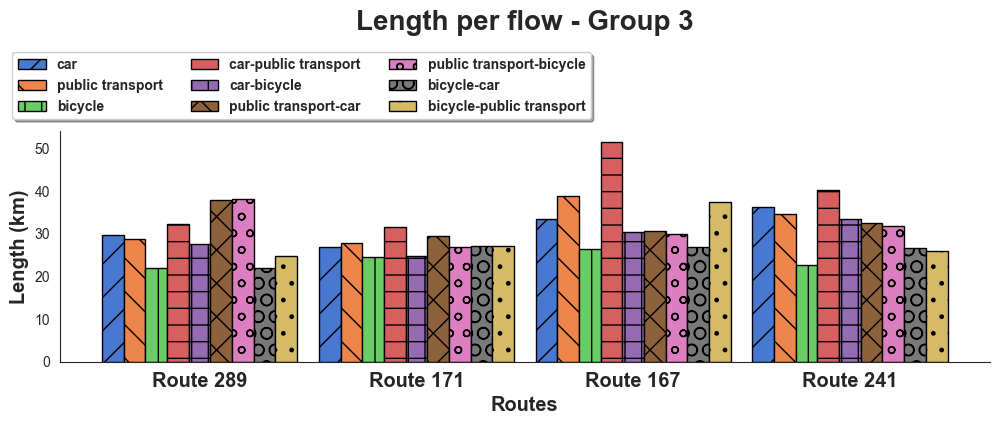

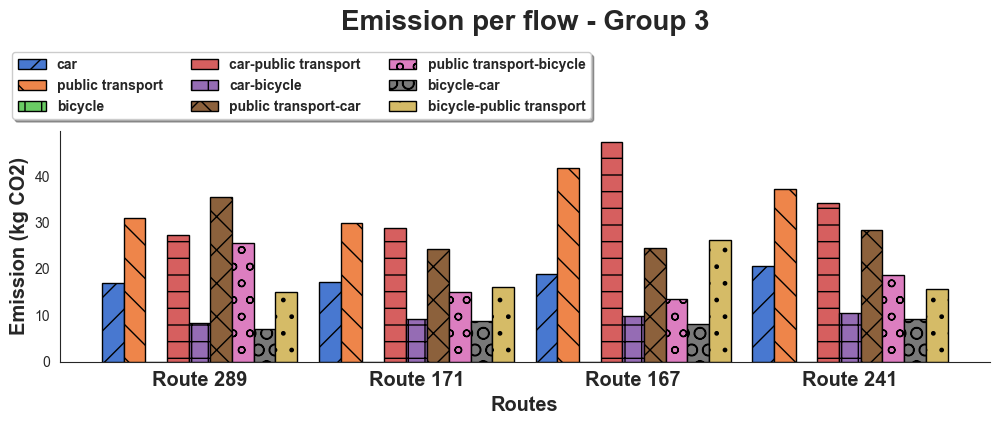

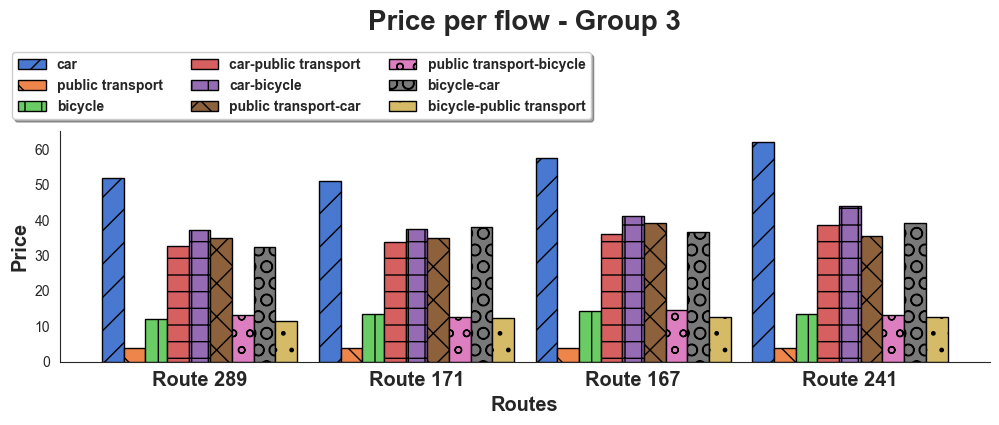

In [13]:
## barplot
rd.seed(10)

for j in range(len(distance_wind)):
    print("group",j+1)
    sampl = rd.sample(sorted(windows[j].index),4)

    group = dataf_new.loc[dataf_new['setID'].isin(sampl)] # group data by sample
    routes = list(map(lambda x: f"Route {int(x)}",sampl)) # route label
 
    for i in ylabels:
        upper = i[0].upper() + i[1:]
        title = f"{upper} per flow - Group {j+1}"
        bars = getBars(group,labels,i)
        plotBars(bars,translator[i],labels,routes,title,fname=title)
    

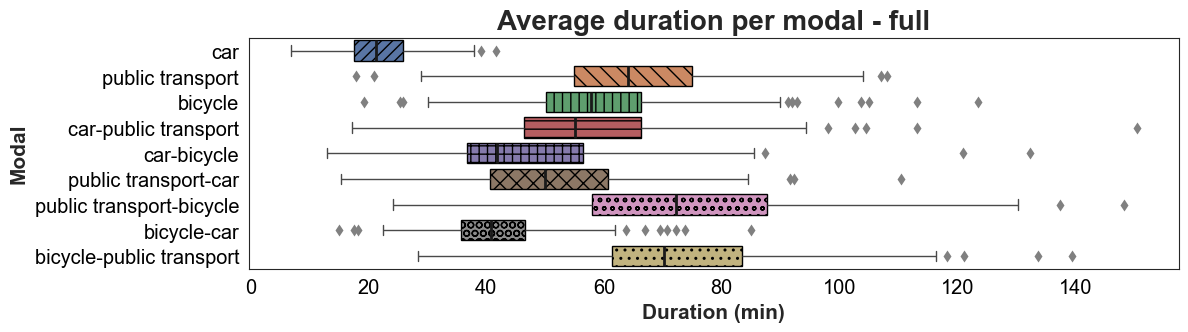

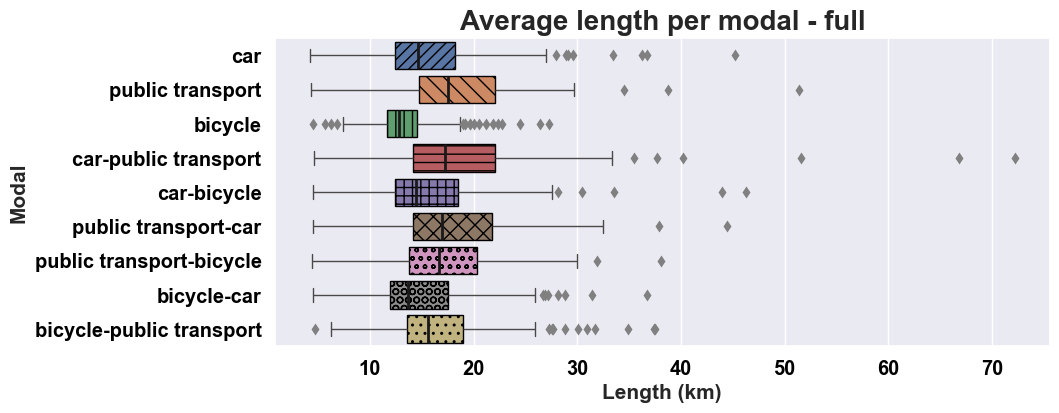

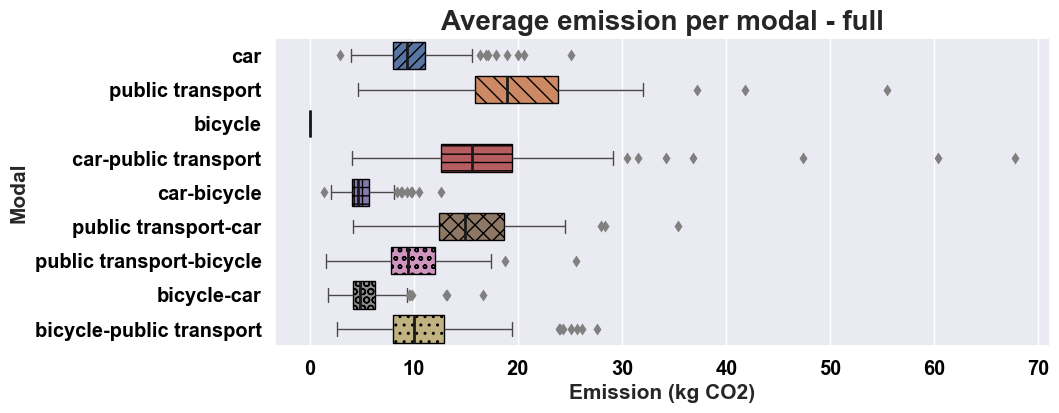

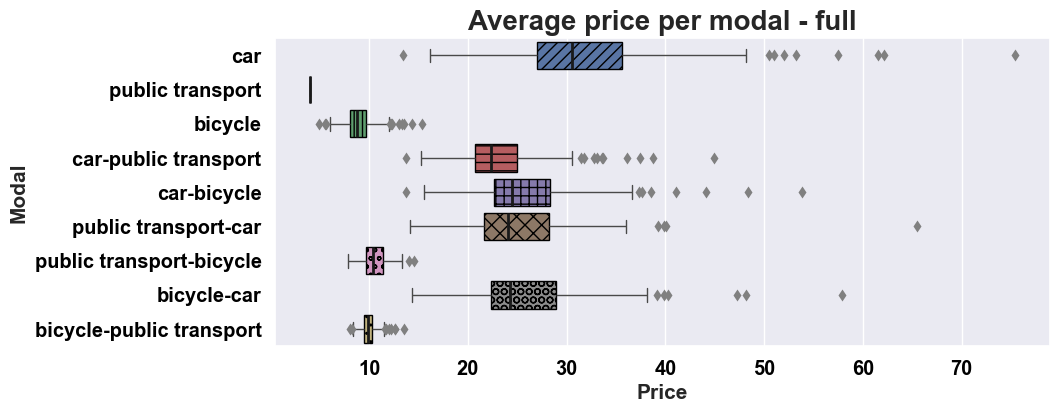

In [14]:
for i in range(len(ylabels)):
    #upper = ylabels[i][0].upper() + ylabels[i][1:]
    title = f"Average {ylabels[i]} per modal - full"
    plotBoxPlots(dataf_new,"modal",translator[ylabels[i]],title,ylabels[i],fname=title)

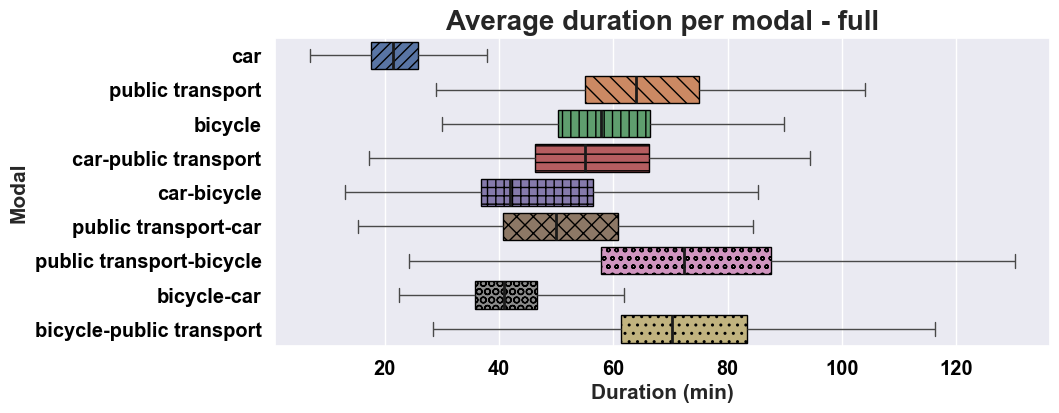

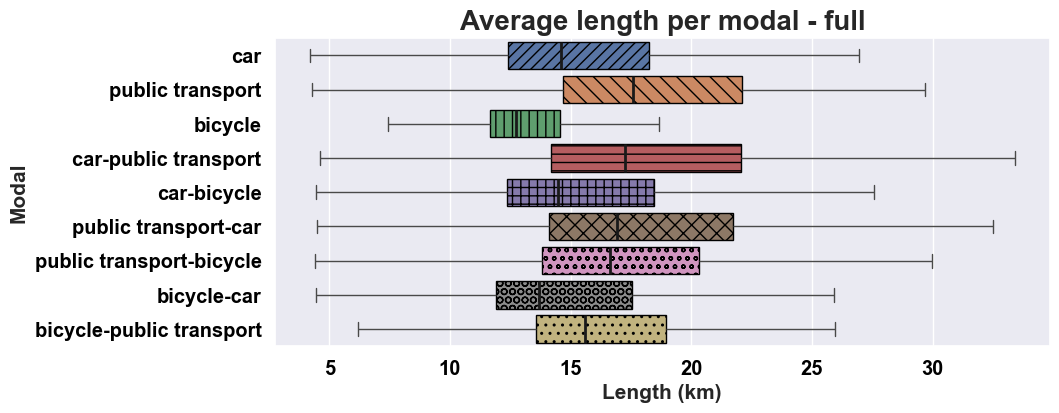

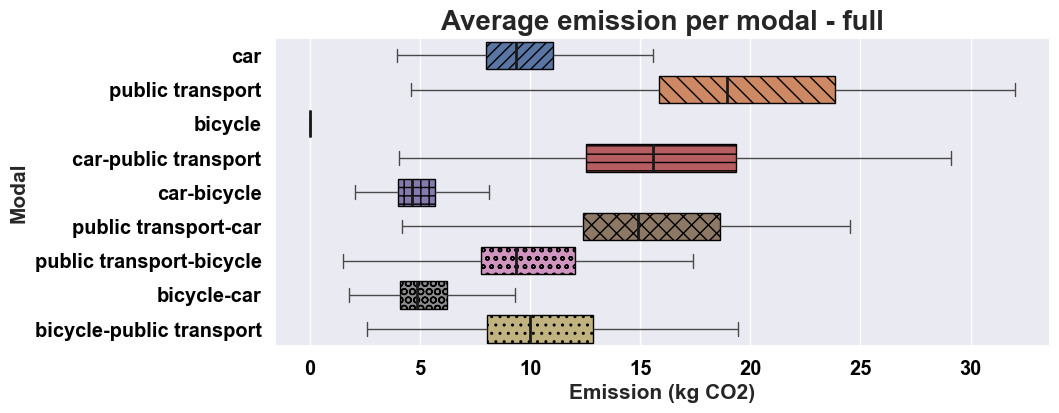

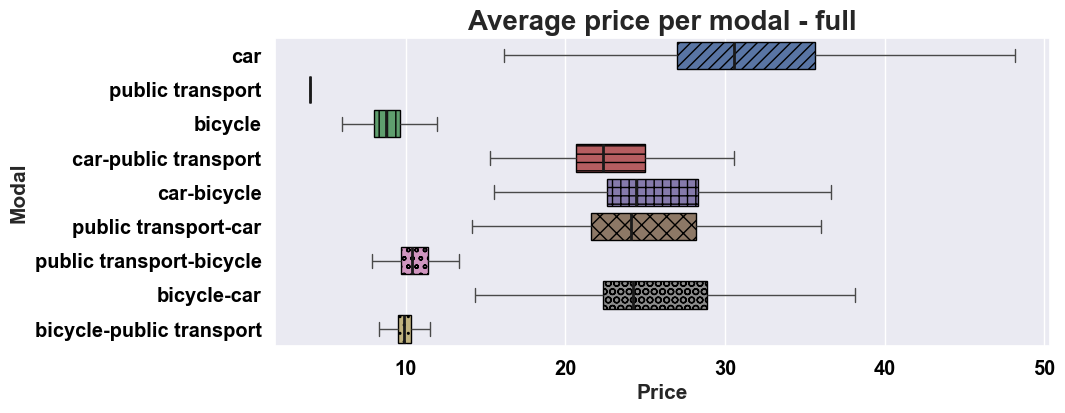

In [15]:
for i in range(len(ylabels)):
    #upper = ylabels[i][0].upper() + ylabels[i][1:]
    title = f"Average {ylabels[i]} per modal - full"
    plotBoxPlots(dataf_new,"modal",translator[ylabels[i]],title,ylabels[i],fname=title,clean=True)

group 1


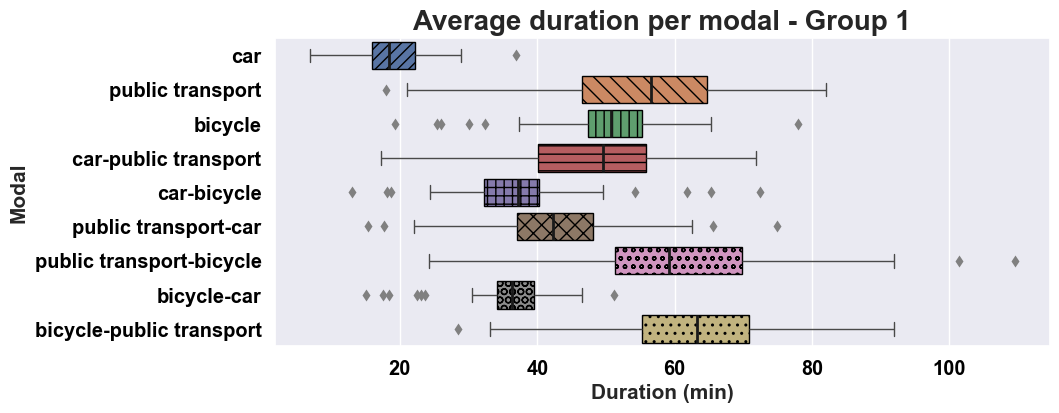

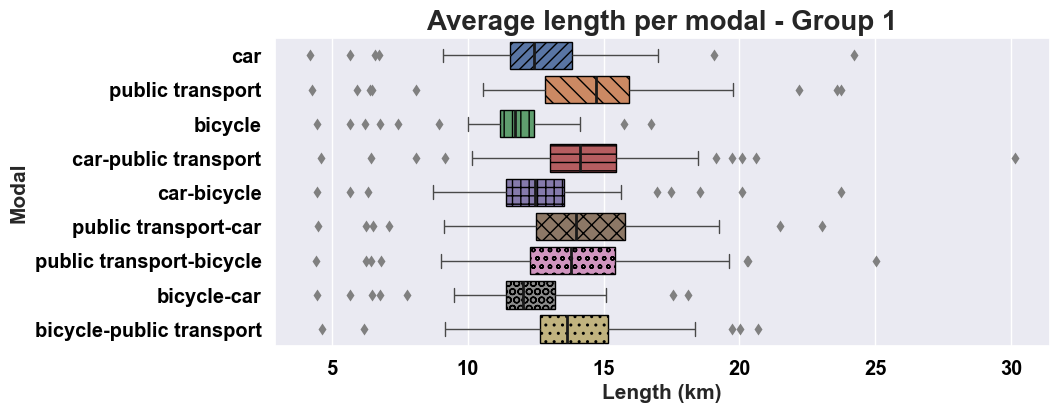

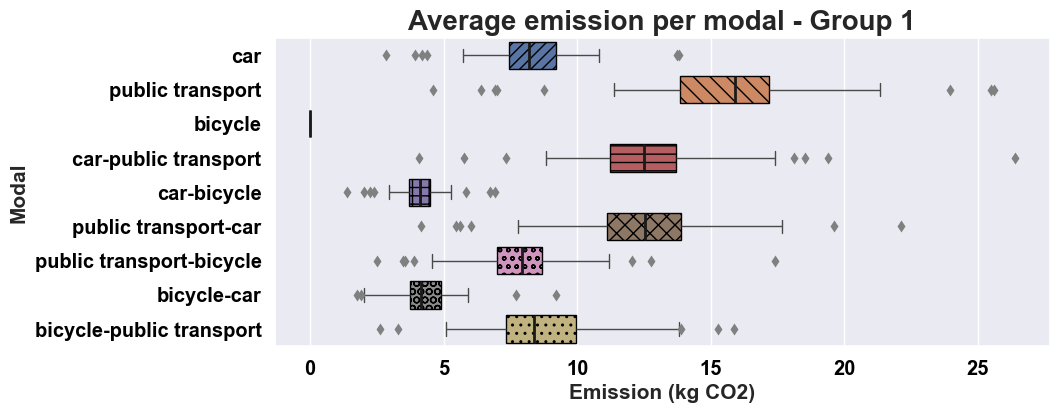

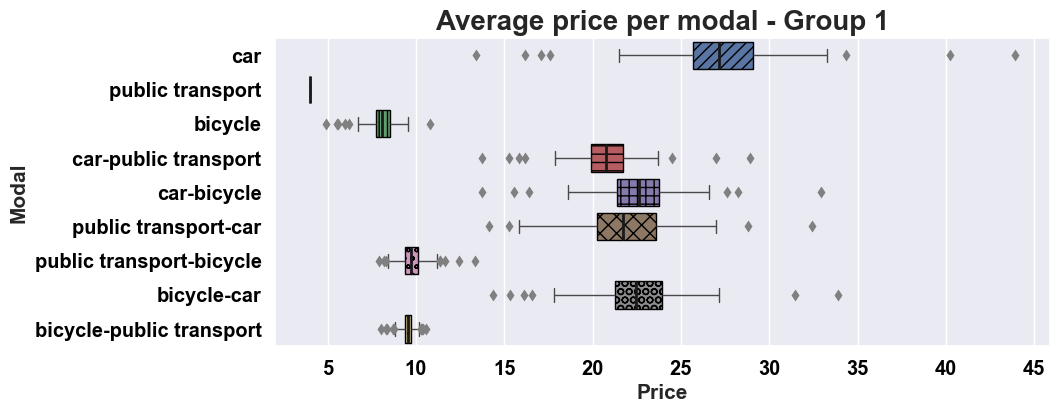

group 2


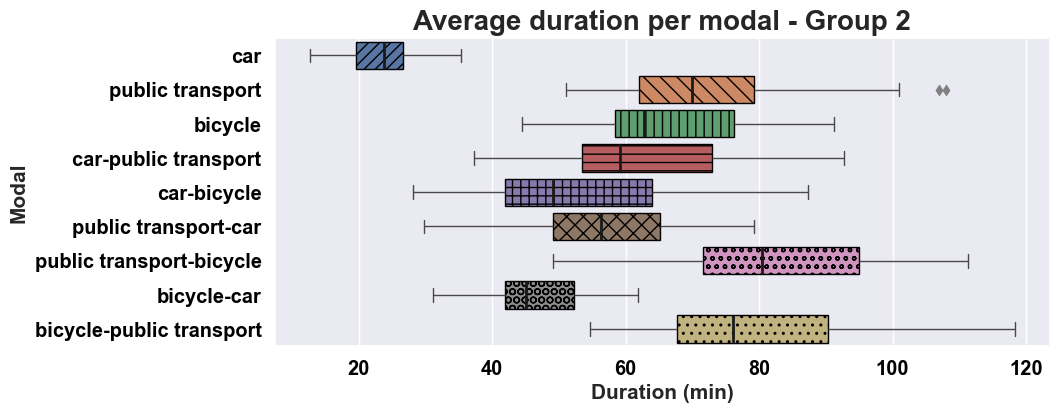

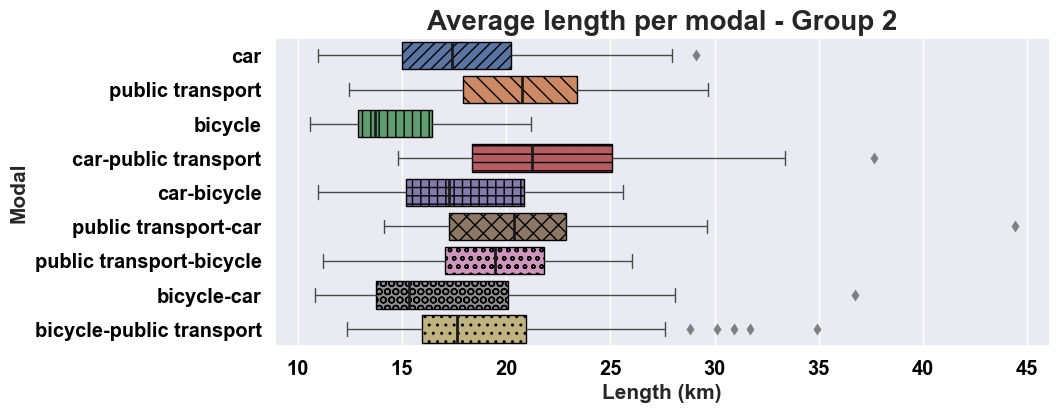

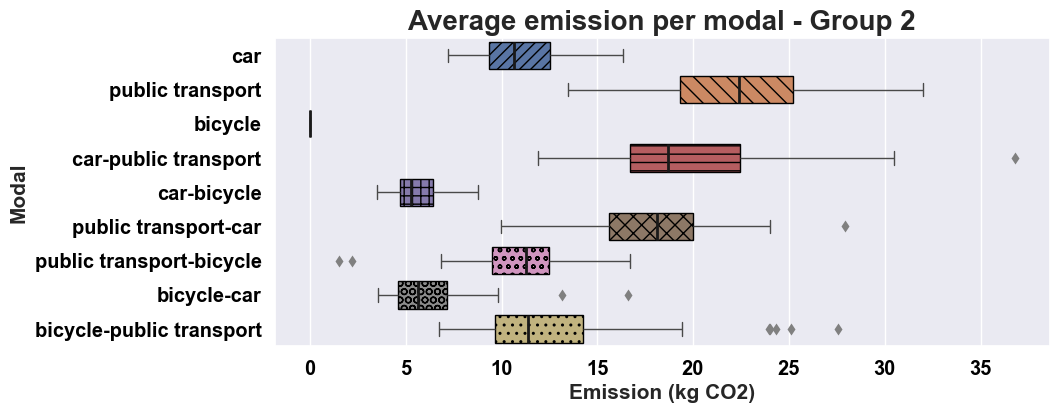

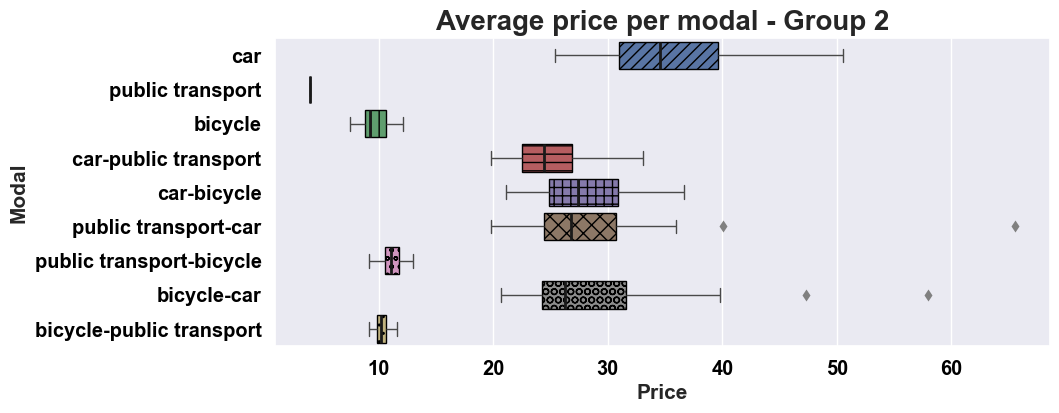

group 3


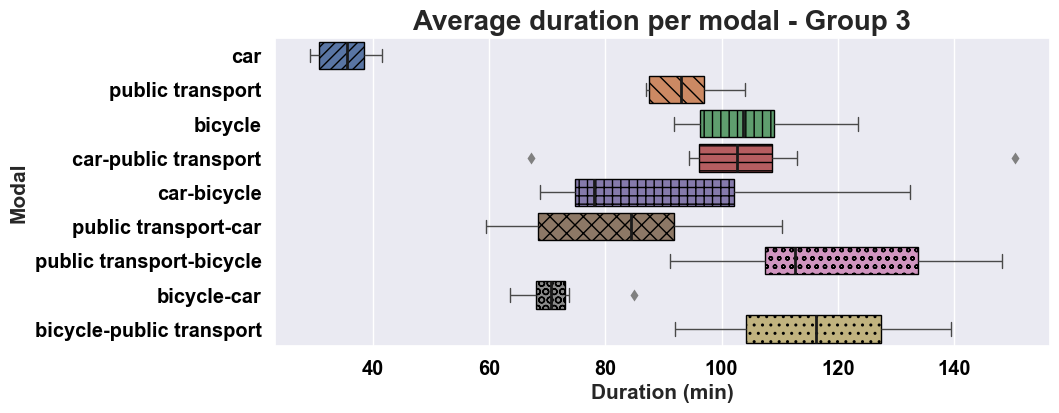

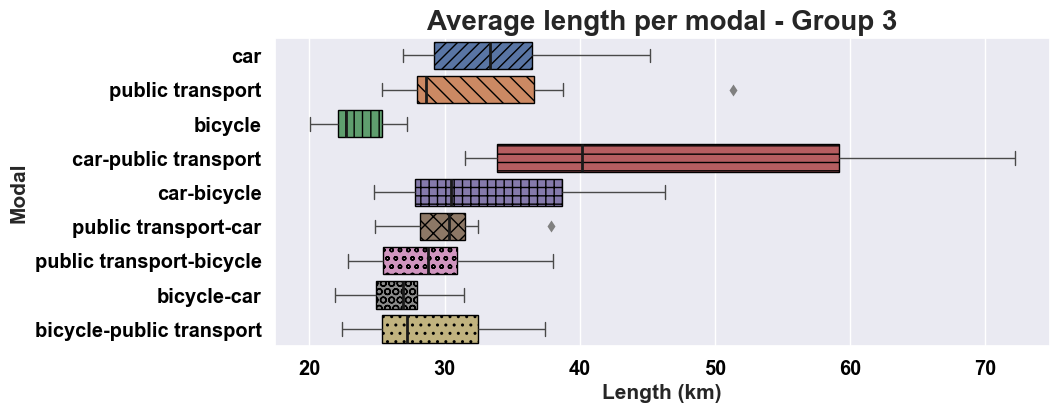

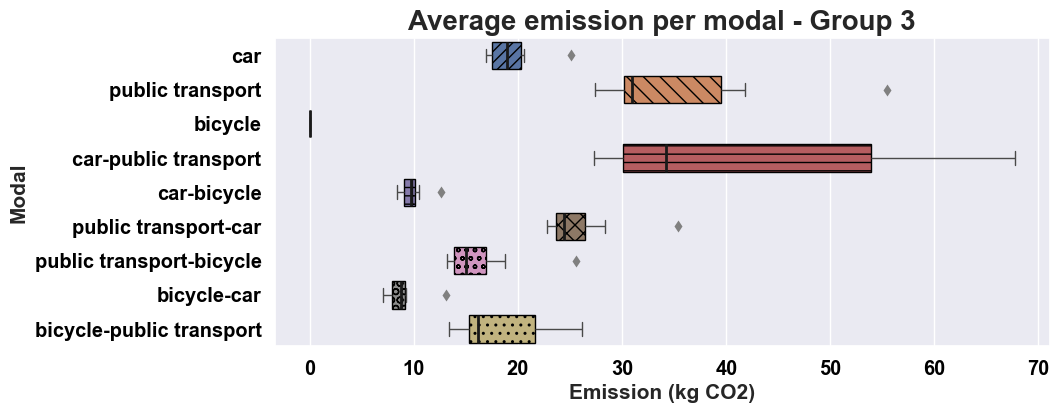

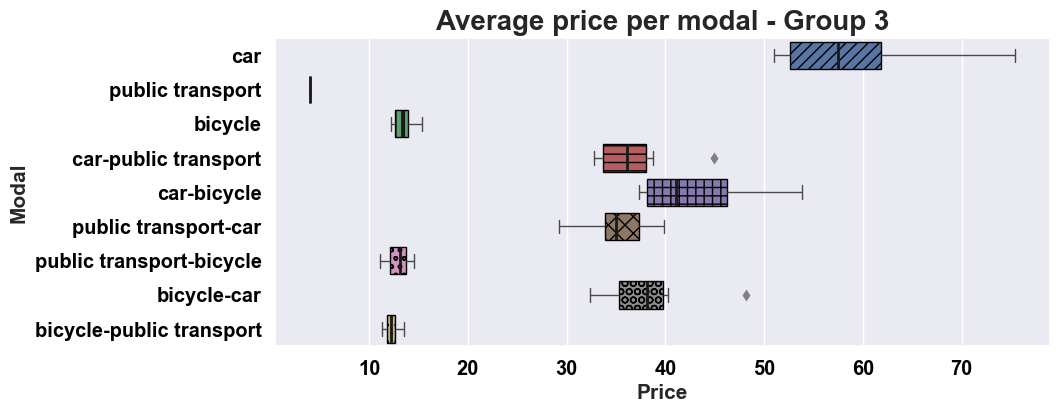

In [16]:
for j in range(len(distance_wind)):
    print("group",j+1)

    group = dataf_new.loc[dataf_new['setID'].isin(windows[j].index)]

    for i in range(len(ylabels)):
        #upper = ylabels[i][0].upper() + ylabels[i][1:]
        title = f"Average {ylabels[i]} per modal - Group {j+1}"
        plotBoxPlots(group,"modal",translator[ylabels[i]],title,ylabels[i],fname=title)

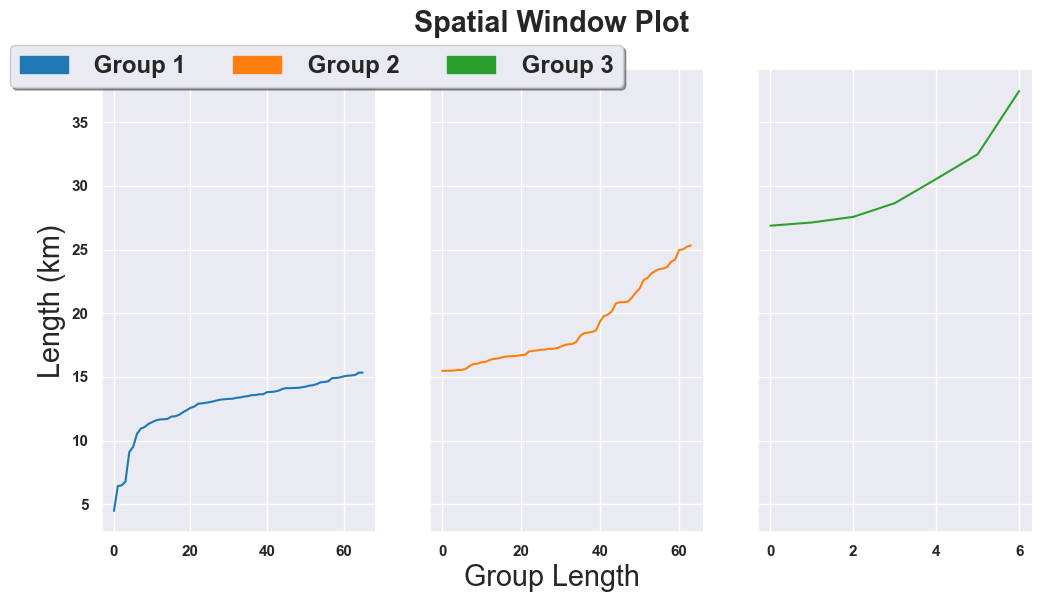

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=False,sharey=True,
                                    figsize=(12, 6))
values1 = sorted(series_wind1.values.tolist())
values2 = sorted(series_wind2.values.tolist())
values3 = sorted(series_wind3.values.tolist())

ax0.plot(range(len(values1)), values1,color="tab:blue",label='group 1',linestyle="solid")
ax1.plot(range(len(values2)), values2,color="tab:orange",label='group 2',linestyle="solid")
ax2.plot(range(len(values3)), values3,color="tab:green",label='group 3',linestyle="solid")

leg_g1 = mpatches.Patch(color="tab:blue",label=" Group 1")
leg_g2 = mpatches.Patch(color="tab:orange",label=" Group 2")
leg_g3 = mpatches.Patch(color="tab:green",label=" Group 3")

plt.legend(loc="upper right",
           bbox_to_anchor=(-0.45,1.08),
           ncol=3,
           fancybox=True,
           shadow=True,
           fontsize="x-large",
           handles = [leg_g1,leg_g2,leg_g3])

fig.suptitle('Spatial Window Plot',fontsize="xx-large",fontweight="bold")
fig.supxlabel("Group Length",fontsize="xx-large")
#fig.supylabel("Length (m)",fontsize="xx-large")

ax0.set_ylabel("Length (km)",fontsize="xx-large")

sns.set_style("whitegrid", {'grid.linestyle': '--','axes.facecolor': '#F4F4F4'})
plt.savefig('results/plots/groups.pdf',bbox_inches="tight")
sns.despine(top=True,left=False)
plt.show()

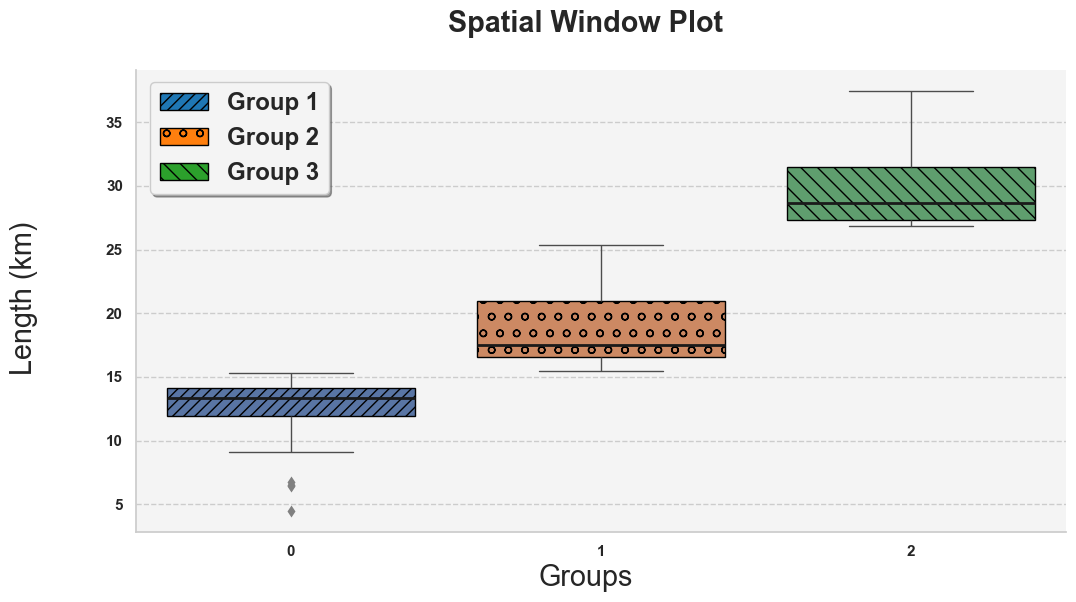

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

#rng1 = dataf_new.loc[dataf_new['setID'].isin(list(windows[0].index))]['length']
#rng2 = dataf_new.loc[dataf_new['setID'].isin(list(windows[1].index))]['length']
#rng3 = dataf_new.loc[dataf_new['setID'].isin(list(windows[2].index))]['length']
#rng = [rng1,rng2,rng3]

values1 = sorted(series_wind1.values.tolist())
values2 = sorted(series_wind2.values.tolist())
values3 = sorted(series_wind3.values.tolist())
rng = [values1,values2,values3]

flierprops = {"marker":"d",
            'markeredgecolor': 'none',
            'markerfacecolor': 'grey'}
medianprops = {"color":"k","linewidth": 2}
sns.boxplot(data=rng,patch_artist=True,boxprops=dict(edgecolor="black"),flierprops=flierprops,medianprops=medianprops)

hatches = ['///', 'o', '\\\\']

leg_g1 = mpatches.Patch(facecolor="tab:blue",label="Group 1",edgecolor='black',hatch=hatches[0])
leg_g2 = mpatches.Patch(facecolor="tab:orange",label="Group 2",edgecolor='black',hatch=hatches[1])
leg_g3 = mpatches.Patch(facecolor="tab:green",label="Group 3",edgecolor='black',hatch=hatches[2])

plt.legend(loc="upper right",
           bbox_to_anchor=(0.22,1),
           ncol=1,
           fancybox=True,
           shadow=True,
           fontsize="x-large",
           handles = [leg_g1,leg_g2,leg_g3])

for i, box in enumerate(ax.patches):
    box.set_hatch(hatches[i])
    fc = box.get_facecolor()
    box.set_edgecolor('black')
    box.set_facecolor(fc)


fig.suptitle('Spatial Window Plot',fontsize="xx-large",fontweight="bold")
fig.supxlabel("Groups",fontsize="xx-large")
fig.supylabel("Length (km)",fontsize="xx-large")

sns.set_style("whitegrid", {'grid.linestyle': '--','axes.facecolor': '#F4F4F4'})
plt.savefig('results/plots/boxGroups.pdf',bbox_inches="tight")
sns.despine(top=True,left=False)
plt.show()

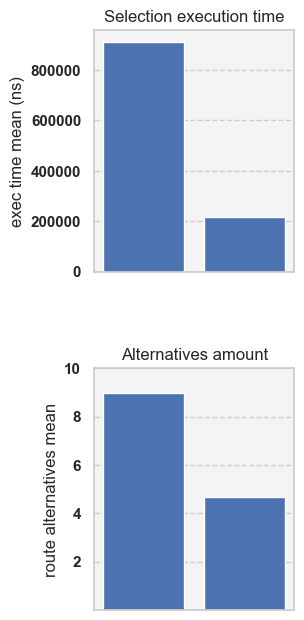

In [19]:
#df.groupby("setID")['ID'].count().mean()

fig, axs = plt.subplots(2,1)

plt.subplots_adjust(left=0.3,
                    bottom=-0.2, 
                    right=0.5, 
                    top=1.25, 
                    wspace=0.4, 
                    hspace=0.4)
name = ["multimodal","route"]
value = [exec_dfModal['execution_time (ns)'].mean(),exec_dfCriteria['execution_time (ns)'].mean()]
value2 = [9,4.685314685314685]
axs[0].bar(name,value)
axs[0].set_title('Selection execution time')
axs[0].set_ylabel("exec time mean (ns)")
axs[0].set_xticks([])
axs[1].set_title('Alternatives amount')
axs[1].set_ylabel("route alternatives mean")
axs[1].bar(name,value2)
axs[1].set_yticks([2,4,6,8,10])
axs[1].set_xticks([])

plt.savefig("results/plots/execution_time.pdf",bbox_inches="tight")
plt.show()

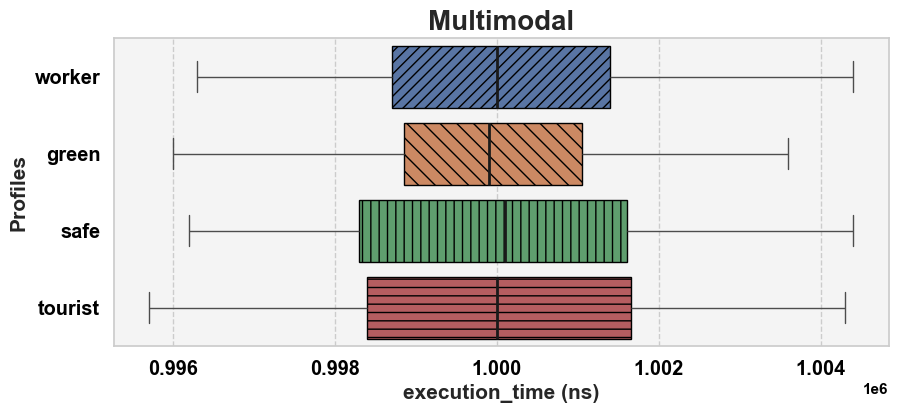

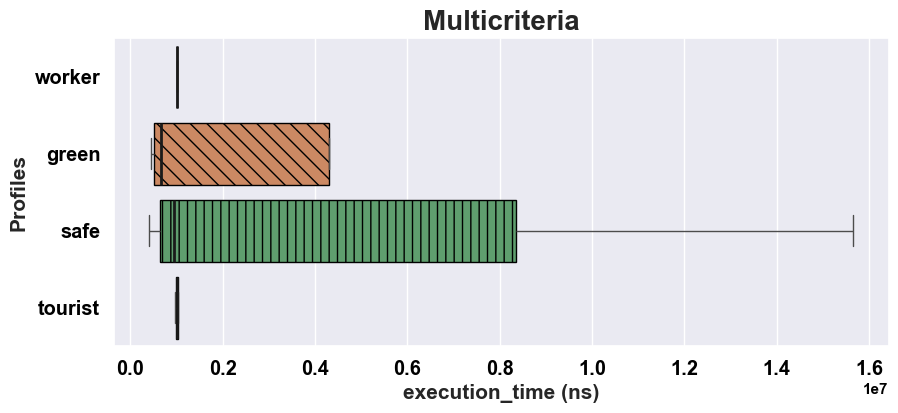

In [20]:
column = exec_dfModal.columns[2]
modalPlot = exec_dfModal
criteriaPlot = exec_dfCriteria

modalPlot.drop(exec_dfModal[exec_dfModal["execution_time (ns)"] == 0].index, inplace = True)
criteriaPlot.drop(exec_dfCriteria[exec_dfCriteria["execution_time (ns)"] == 0].index, inplace = True)

title = column
plotBoxPlots(exec_dfModal,"profiles",column,"Multimodal",column,"profiles",clean=True)

plotBoxPlots(exec_dfCriteria,"profiles",column,"Multicriteria",column,"profiles",clean=True)

In [59]:
exec_dfModal.rename(columns={'Unnamed: 0':'ID'},inplace=True)
exec_dfCriteria.rename(columns={'Unnamed: 0':'ID'},inplace=True)

modal_cumsum = exec_dfModal.groupby('profiles')['execution_time (ns)'].cumsum()
exec_dfModal['cumulative_exec'] = modal_cumsum
modal_cumsum = exec_dfModal.groupby('profiles')['memory_usage'].cumsum()
exec_dfModal['cumulative_memory'] = modal_cumsum

criteria_cumsum = exec_dfCriteria.groupby('profiles')['execution_time (ns)'].cumsum()
exec_dfCriteria['cumulative_exec'] = criteria_cumsum
criteria_cumsum = exec_dfCriteria.groupby('profiles')['memory_usage'].cumsum()
exec_dfCriteria['cumulative_memory'] = criteria_cumsum

exec_dfModal['ID'] = exec_dfModal.groupby('profiles').cumcount()
exec_dfCriteria['ID'] = exec_dfCriteria.groupby('profiles').cumcount()

In [60]:
exec_dfModal.to_csv('test.csv')
exec_dfCriteria.to_csv('test2.csv')
exec_dfCriteria.groupby('profiles')['ID'].count()

profiles
green      142
safe       142
tourist    142
worker     142
Name: ID, dtype: int64

In [74]:
nsToMs = lambda x: x / 10**6

exec_dfModal['cumulative_exec'] = exec_dfModal['cumulative_exec'].apply(nsToMs)
exec_dfCriteria['cumulative_exec'] = exec_dfCriteria['cumulative_exec'].apply(nsToMs)

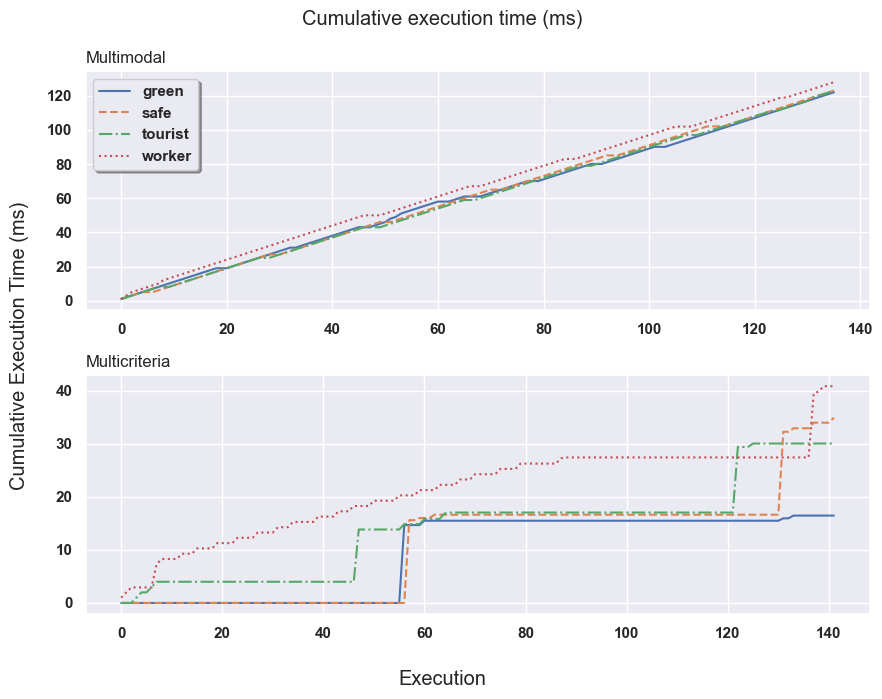

In [80]:
fig, ax = plt.subplots(2, 1, figsize=(9, 7))

linestyles = ['-', '--', '-.', ':']
line = 0
for profile, data in exec_dfModal.groupby('profiles'):
    ax[0].plot(data['ID'].values, data['cumulative_exec'].values, label=profile,ls=linestyles[line])
    line += 1
line = 0
for profile, data in exec_dfCriteria.groupby('profiles'):
    ax[1].plot(data['ID'].values, data['cumulative_exec'], label=profile,ls=linestyles[line])
    line += 1

plt.suptitle('Cumulative execution time (ms)')
ax[0].set_title("Multimodal",loc='left')
ax[1].set_title("Multicriteria",loc='left')
fig.supxlabel('Execution amount')
fig.supylabel('Cumulative Execution Time (ms)')


formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

ax[0].legend(
    #bbox_to_anchor=(0.76,0.57),
    loc = 'upper left',
    ncol=1,
    fancybox=True,
    shadow=True,
    #fontsize="x-large",
    #handles = handles_list
    )

# Set the formatter
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.savefig('results/plots/Cumulative Execution Time (ms).pdf',bbox_inches="tight")
plt.show()